<div style="color:#00BFFF">

# Nowcasting Consumer Expenditure: 

<div style="color:#00BFFF">

### About the Data

#### Primary Dataset Description

**Short Description:** The primary dataset is "Table 1.1.5. Gross Domestic Product" from the U.S. Bureau of Economic Analysis. It comprises seasonally adjusted quarterly U.S. Gross Domestic Product (GDP) rates in billions of dollars.

**Relevance:** The dataset's detailed information on U.S. GDP over several years is integral to the project's goal of nowcasting consumption. The data's granularity and time-series nature will allow for comprehensive analysis and identification of trends, making it pivotal for the project's success.

**Data frequency:** The data reflecting the economic output of the United States is crucial for analyzing economic trends and growth patterns. The presentation of data is done quarterly by the GDP component.

**Location:** Available at [U.S. Bureau of Economic Analysis](https://apps.bea.gov/iTable/?reqid=19&step=2&isuri=1&categories=survey&_gl=1*j1lvlb*_ga*MTk0MDMyMjk0MC4xNzA1NDk1NTk4*_ga_J4698JNNFT*MTcwNTQ5NTU5OC4xLjEuMTcwNTQ5NzA2MC42MC4wLjA.#eyJhcHBpZCI6MTksInN0ZXBzIjpbMSwyLDMsM10sImRhdGEiOltbImNhdGVnb3JpZXMiLCJTdXJ2ZXkiXSxbIk5JUEFfVGFibGVfTGlzdCIsIjUiXSxbIkZpcnN0X1llYXIiLCIxOTQ3Il0sWyJMYXN0X1llYXIiLCIyMDIzIl0sWyJTY2FsZSIsIi05Il0sWyJTZXJpZXMiLCJRIl1dfQ==). ([BEA](https://apps.bea.gov/iTable/?reqid=19&step=2&isuri=1&categories=survey&_gl=1*j1lvlb*_ga*MTk0MDMyMjk0MC4xNzA1NDk1NTk4*_ga_J4698JNNFT*MTcwNTQ5NTU5OC4xLjEuMTcwNTQ5NzA2MC42MC4wLjA.#eyJhcHBpZCI6MTksInN0ZXBzIjpbMSwyLDMsM10sImRhdGEiOltbImNhdGVnb3JpZXMiLCJTdXJ2ZXkiXSxbIk5JUEFfVGFibGVfTGlzdCIsIjUiXSxbIkZpcnN0X1llYXIiLCIxOTQ3Il0sWyJMYXN0X1llYXIiLCIyMDIzIl0sWyJTY2FsZSIsIi05Il0sWyJTZXJpZXMiLCJRIl1dfQ==))

**Format:** CSV

**Access Method:** The dataset is readily available and can be easily accessed and downloaded directly from the U.S. Bureau of Economic Analysis website.


#### Secondary Datasets

##### Federal Reserve Economic Data (FRED)

**Short Description:** This dataset is sourced from the Federal Reserve Bank of St. Louis's FRED macroeconomic database. It contains a variety of economic data points available at monthly intervals, with a particular focus on US GDP data. The data covers consumer spending indicators, a crucial component of the Gross Domestic Product (GDP).

**Relevance**: Complements the primary dataset with additional economic indicators, useful for cross-referencing and correlation analysis.

**Data frequency:** The monthly frequency of this dataset provides a more detailed temporal resolution than the primary dataset, which may reveal more immediate economic trends. This granularity will be useful in identifying more immediate proxies for nowcasting.

**Estimated Size**: 0.6MB

**Location**: https://research.stlouisfed.org/econ/mccracken/fred-databases/

**Format**: CSV.

**Access Method**: Direct download.

<div style="color:#00BFFF">

### Setup Environment and import libraries

In [1]:
# Activate the virtual environment by running in terminal: 
# python -m venv myenv
# source myenv/bin/activate
# ! source /myenv/bin/activate

# ------- PIP INSTALLS -------
# ! pip install --upgrade pip
# ! pip install -r requirements.txt

# Run the imports file
%matplotlib inline

In [2]:
# ------- Standard Library Imports -------
import warnings
from pprint import pprint
# from typing import List

# ------- Third-Party Library Imports -------
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt

# Remove warnings
warnings.filterwarnings('ignore')

# Set the display options
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)  
pd.set_option('display.max_colwidth', None)  

/var/folders/30/bhymp02j1fb47cmvs80_1b4m0000gn/T/ipykernel_89021/615382996.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<div style="color:#00BFFF">

### Load datasets

<div style="color:#00BFFF">

##### Load and preprocesses BEA Dataset


**Loads and preprocesses** the GDP data from a CSV file. Process a DataFrame to create a structured description column.

**Handling Missing Values**: Utilize median imputation for missing values, as it's less influenced by outliers and provides a more representative central tendency.

**Outliers and Anomalies**: Apply Interquartile Range (IQR) or Z-score analysis to identify and address outliers. This step ensures the integrity of data by minimizing the impact of extreme values.

In [3]:
from utils.bea_load_data import load_and_preprocess_gdp_data,create_structured_description, create_short_description, transform_date_formats

file_path = './data/bea/bea_usgdp.csv'

# Load and preprocess the data
pce_df = load_and_preprocess_gdp_data(file_path)

# create hierarchy for GDP data
pce_df = create_structured_description(pce_df)

# create short description for GDP data
pce_df = create_short_description(pce_df)

#extract only PCE data
pce_df = pce_df[pce_df['short_description'].str.contains('PCE')]

# Transform the date formats
pce_df = transform_date_formats(pce_df)

#save the data
pce_df.to_csv('./results/bea/bea_pce_original.csv', index=False)

In [4]:
pce_df.head()

short_description,PCE,PCE_Goods,PCE_Goods_Durable_goods,PCE_Goods_Nondurable_goods,PCE_Services
1947Q1,156.2,95.6,20.7,74.9,60.6
1947Q2,160.0,98.2,21.4,76.9,61.8
1947Q3,163.5,100.4,21.8,78.6,63.1
1947Q4,167.7,103.5,23.5,80.0,64.2
1948Q1,170.4,105.1,23.5,81.5,65.3


<div style="color:#00BFFF">

##### Visualy inspect the BEA data


In [5]:

def plot_time_series_with_iqr_and_extended_range_subplot(df, ax, column):
    # Use the index as it is already in datetime format
    datetime_index = df.index

    # Calculate statistics
    median = df[column].median()
    std = df[column].std()
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = median - 2.698 * std
    upper_whisker = median + 2.698 * std
    
    # Plot the time series line graph
    ax.plot(datetime_index, df[column], marker='o', markersize=3, color='black', linewidth=1, label='PCE')

    # Shade the IQR
    ax.fill_between(datetime_index, Q1, Q3, color='grey', alpha=0.4, label='IQR')
    
    # Shade the extended range
    ax.fill_between(datetime_index, lower_whisker, upper_whisker, color='lightgrey', alpha=0.3, label='Extended Range')
    
    # Mark potential outliers
    outliers = df[column][(df[column] < lower_whisker) | (df[column] > upper_whisker)]
    ax.scatter(outliers.index, outliers, color='red', zorder=5, label='Outliers')

    # Add median line
    ax.axhline(median, color='darkgreen', linestyle='--', linewidth=1.0, label='Median')
    
    # Add upper and lower whiskers lines
    ax.axhline(upper_whisker, color='grey', linestyle='--', linewidth=1, label='Upper Whisker')
    ax.axhline(lower_whisker, color='grey', linestyle='--', linewidth=1, label='Lower Whisker')

    # Add labels and legend
    ax.set_xlabel('Time')
    ax.set_ylabel(column)
    ax.set_title(f'{column}')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(False)
    
def plot_stacked_area_chart(data, ax):
    # Plotting the stacked area chart for specified columns
    ax.stackplot(data.index, data['PCE_Goods_Durable_goods'], data['PCE_Goods_Nondurable_goods'], data['PCE_Services'],
                 labels=['PCE_Goods_Durable_goods','PCE_Goods_Nondurable_goods', 'PCE_Services'], 
                 alpha=0.5)

    # Add labels and legend
    ax.set_xlabel('Time')
    ax.set_ylabel('Expenditure')
    ax.set_title('Stacked Area Chart of PCE Components')
    ax.legend(loc='upper left')
    ax.grid(False)



The rate of change is typically calculated as 
(
Current Value
−
Previous Value
Previous Value
)
×
100
%
( 
Previous Value
Current Value−Previous Value
​	
 )×100%, which can be easily computed using the pct_change() function in pandas, and then multiplying by 100 to convert it to a percentage.

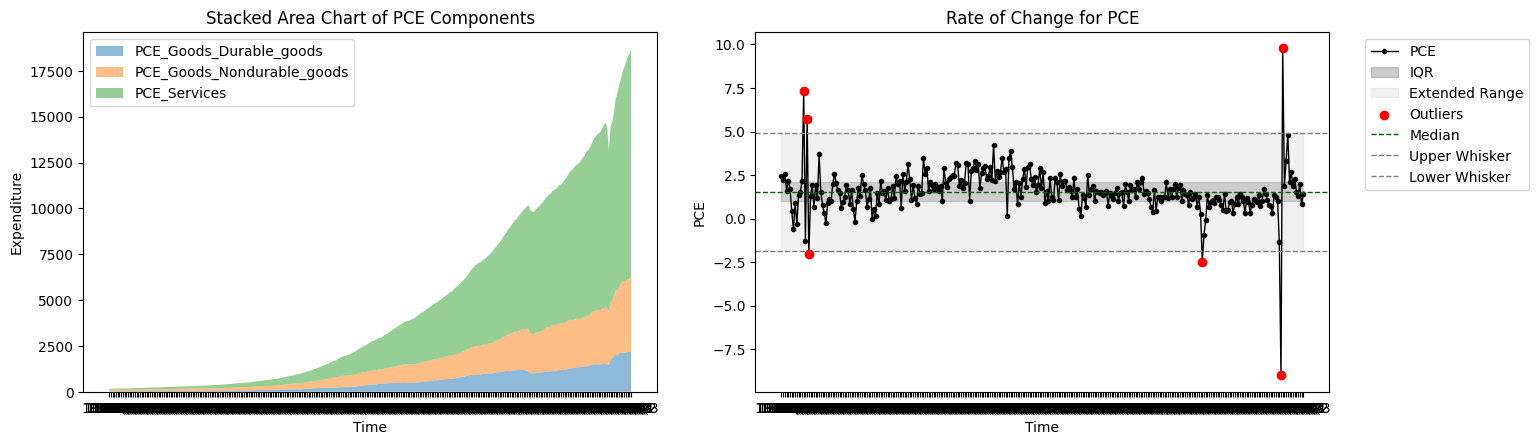

Correlation matrix for PCE and its components:


short_description,PCE,PCE_Goods,PCE_Goods_Durable_goods,PCE_Goods_Nondurable_goods,PCE_Services
short_description,,,,,
PCE,1.000000,0.997862,0.991587,0.998508,0.999515
PCE_Goods,0.997862,1.000000,0.996691,0.999050,0.995342
PCE_Goods_Durable_goods,0.991587,0.996691,1.000000,0.992201,0.987662
PCE_Goods_Nondurable_goods,0.998508,0.999050,0.992201,1.000000,0.996748
PCE_Services,0.999515,0.995342,0.987662,0.996748,1.000000


In [6]:
def analyze_and_plot(pce_df, columns_for_correlation):
    """
    Function to analyze and plot data from the given DataFrame.
    """

    # Calculate the rate of change for each column
    pce_real_growth = pce_df.pct_change().dropna() * 100

    # Selecting the relevant columns for correlation
    correlation_data = pce_df[columns_for_correlation]

    # Plotting
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))
    fig.tight_layout(pad=4.0)

    plot_stacked_area_chart(pce_df, axs[0])
    plot_time_series_with_iqr_and_extended_range_subplot(pce_real_growth, axs[1], 'PCE')

    axs[1].set_title('Rate of Change for PCE')
    plt.show()

    # Display the correlation matrix
    correlation_matrix = correlation_data.corr()
    return correlation_matrix

# Example usage
columns_for_correlation = ['PCE', 'PCE_Goods', 'PCE_Goods_Durable_goods','PCE_Goods_Nondurable_goods', 'PCE_Services']
result = analyze_and_plot(pce_df, columns_for_correlation)

print(f'Correlation matrix for PCE and its components:')
result


**Interpretation of Scatter Plots with Regression Lines:**

Scatter plots with regression lines for each component ('PCE_Goods_Durable_goods', 'PCE_Goods_Nondurable_goods', 'PCE_Services') against 'PCE' illustrate the linear relationships between these components and the total PCE. The regression lines provide a visual indicator of the direction, strength, and linearity of these relationships.

**Interpretation of the Correlation Matrix:**

The correlation matrix, particularly its visualization through the heatmap, shows the Pearson correlation coefficients between 'PCE' and its components. The coefficients near 1 indicate a very strong positive linear relationship.

<div style="color:#00BFFF">

##### Loading the FRED data

The `load_fredmd_data` function, below, performs the following actions, once for the FRED-MD dataset and once for the FRED-QD dataset:

1. Based on the `vintage` argument, it downloads a particular vintage of these datasets from the base URL https://files.stlouisfed.org/files/htdocs/fred-md into the `orig_m` variable.
2. Extracts the column describing which transformation to apply, shortname and description mappings
3. Extracts the observation date (from the "sasdate" column) and uses it as the index of the dataset.

In [7]:
def load_fredmd_data(vintage):
    """
    Loads and processes the FRED-MD data.
    """
    # Define the base URL for the FRED-MD dataset
    base_url = 'https://files.stlouisfed.org/files/htdocs/fred-md'

    # Load the dataset for the specified 'vintage', dropping rows that are entirely NA
    fred_orig = pd.read_csv(f'{base_url}/monthly/{vintage}.csv').dropna(how='all')

    # Extract transformation codes (second column onwards) from the first row
    transform_info = fred_orig.iloc[0, 1:]

    # Drop the first row (containing transformation info) from the dataset
    fred_orig = fred_orig.iloc[1:]

    # Convert 'sasdate' column to a PeriodIndex with monthly frequency for time-series analysis
    fred_orig.index = pd.PeriodIndex(fred_orig.sasdate.tolist(), freq='M')

    # Remove the 'sasdate' column as it's now set as the index
    fred_orig.drop('sasdate', axis=1, inplace=True)

    # Return the processed data and the transformation information
    return fred_orig, transform_info


# Load data for the current vintage and unpack into original data and transformation info
fred_orig, transform_info = load_fredmd_data("current")

# Save the original data
fred_orig.to_csv('./results/fred/fred_monthly_orig.csv', index=False)

fred_orig.head(2)

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,IPNCONGD,IPBUSEQ,IPMAT,IPDMAT,IPNMAT,IPMANSICS,IPB51222S,IPFUELS,CUMFNS,HWI,HWIURATIO,CLF16OV,CE16OV,UNRATE,UEMPMEAN,UEMPLT5,UEMP5TO14,UEMP15OV,UEMP15T26,UEMP27OV,CLAIMSx,PAYEMS,USGOOD,CES1021000001,USCONS,MANEMP,DMANEMP,NDMANEMP,SRVPRD,USTPU,USWTRADE,USTRADE,USFIRE,USGOVT,CES0600000007,AWOTMAN,AWHMAN,HOUST,HOUSTNE,HOUSTMW,HOUSTS,HOUSTW,PERMIT,PERMITNE,PERMITMW,PERMITS,PERMITW,ACOGNO,AMDMNOx,ANDENOx,AMDMUOx,BUSINVx,ISRATIOx,M1SL,M2SL,M2REAL,BOGMBASE,TOTRESNS,NONBORRES,BUSLOANS,REALLN,NONREVSL,CONSPI,S&P 500,S&P: indust,S&P div yield,S&P PE ratio,FEDFUNDS,CP3Mx,TB3MS,TB6MS,GS1,GS5,GS10,AAA,BAA,COMPAPFFx,TB3SMFFM,TB6SMFFM,T1YFFM,T5YFFM,T10YFFM,AAAFFM,BAAFFM,TWEXAFEGSMTHx,EXSZUSx,EXJPUSx,EXUSUKx,EXCAUSx,WPSFD49207,WPSFD49502,WPSID61,WPSID62,OILPRICEx,PPICMM,CPIAUCSL,CPIAPPSL,CPITRNSL,CPIMEDSL,CUSR0000SAC,CUSR0000SAD,CUSR0000SAS,CPIULFSL,CUSR0000SA0L2,CUSR0000SA0L5,PCEPI,DDURRG3M086SBEA,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
1959-01,2583.560,2426.0,15.188,276676.8154,18235.77392,21.9665,23.3891,22.2688,31.7011,19.0149,38.1501,8.0434,20.0387,11.9952,30.6591,20.8382,19.9173,34.6654,80.1973,1357.0,0.333579,67936,63868,6.0,16.3,1574,1169,1396,594,802,291078,52478,18796,713.0,2993,14998,8740,6258,33682,10774,2568.7,5350.3,2418,8105,39.8,2.5,40.2,1657,350,452,505,350,NaN,NaN,NaN,NaN,NaN,NaN,14716.48296,NaN,42620.34624,84889.55898,1.560000,138.9,286.6,987.9,50500,18.9,18300,35.2130,24.9242,48.96116,0.124965,55.62,59.30,3.158342,18.445741,2.48,3.30,2.82,3.09,3.36,4.01,4.02,4.12,4.87,0.82,0.34,0.61,0.88,1.53,1.54,1.64,2.39,NaN,4.3122,359.8417,2.8065,0.9671,33.1,33.4,30.6,31.6,3.0,32.5,29.01,44.8,29.3,21.1,33.3,38.1,22.9,28.9,30.7,29.6,15.164,63.517,18.294,10.152,2.13,2.45,2.04,NaN,6476.0,12298.0,84.2043,NaN
1959-02,2593.596,2434.8,15.346,278713.9773,18369.56308,22.3966,23.7048,22.4617,31.9337,19.1147,38.5147,8.1510,20.6733,12.5477,31.1959,21.2213,19.8631,34.1932,81.4428,1421.0,0.358386,67649,63684,5.9,15.5,1554,1164,1277,545,732,282958,52688,18890,704.2,2980,15115,8839,6276,33798,10816,2575.4,5381.3,2420,8116,39.7,2.6,40.3,1667,346,469,508,344,NaN,NaN,NaN,NaN,NaN,NaN,15400.24873,NaN,43677.15151,85181.81131,1.539338,139.4,287.7,992.1,49800,18.6,18100,35.2201,25.2270,49.51371,0.125765,54.77,58.33,3.219518,18.418119,2.43,3.26,2.70,3.13,3.54,3.96,3.96,4.14,4.89,0.83,0.27,0.70,1.11,1.53,1.53,1.71,2.46,NaN,4.3133,359.8417,2.8093,0.9748,33.2,33.4,30.7,31.4,3.0,32.5,29.00,44.7,29.4,21.2,33.3,38.1,23.0,28.9,30.7,29.6,15.179,63.554,18.302,10.167,2.14,2.46,2.05,NaN,6476.0,12298.0,83.5280,NaN


<div style="color:#00BFFF">

##### Mapping FRED indices to Economic Data groups for analysis per economic group

In this section, we import and organize the definitions of economic variables. 
These definitions are loaded from CSV files corresponding to the FRED-MD and FRED-QD databases. 
This process ensures that we have a clear and concise understanding of each economic variable in our dataset, which is essential for accurate analysis and interpretation of the data.

In [8]:
# Function for Column Name Mapping
def map_column_names(data, defn_file):
    """
    Maps FRED-MD column names to their descriptions.
    """
    # Load the definitions file, ignoring encoding errors
    defn = pd.read_csv(defn_file, encoding_errors='ignore')

    # Set the 'fred' column as the index of the definitions DataFrame
    defn.index = defn.fred

    # Filter the definitions to include only those variables present in the data columns
    defn = defn.loc[data.columns.intersection(defn.fred), :]

    # Create a dictionary mapping FRED-MD variable names to their descriptions
    map_dict = defn['description'].to_dict()

    # Replace the names of columns in the dataset with the descriptions from the map
    return data[map_dict.keys()].rename(columns=map_dict),defn

# Map column names for fred_original 
column_defn_file = './data/FRED/FRED_Definitions_Mapping/fredmd_definitions.csv'
fred_orig,defn = map_column_names(fred_orig, column_defn_file)

fred_orig.head(2)

,Real Personal Income,Real personal income ex transfer receipts,Real personal consumption expenditures,Real Manu. and Trade Industries Sales,Retail and Food Services Sales,IP Index,IP: Final Products and Nonindustrial Supplies,IP: Final Products (Market Group),IP: Consumer Goods,IP: Durable Consumer Goods,IP: Nondurable Consumer Goods,IP: Business Equipment,IP: Materials,IP: Durable Materials,IP: Nondurable Materials,IP: Manufacturing (SIC),IP: Fuels,Capacity Utilization: Manufacturing,Help-Wanted Index for United States,Ratio of Help Wanted/No. Unemployed,Civilian Labor Force,Civilian Employment,Civilian Unemployment Rate,Average Duration of Unemployment (Weeks),Civilians Unemployed - Less Than 5 Weeks,Civilians Unemployed for 5-14 Weeks,Civilians Unemployed - 15 Weeks & Over,Civilians Unemployed for 15-26 Weeks,Civilians Unemployed for 27 Weeks and Over,Initial Claims,All Employees: Total nonfarm,All Employees: Goods-Producing Industries,All Employees: Mining and Logging: Mining,All Employees: Construction,All Employees: Manufacturing,All Employees: Durable goods,All Employees: Nondurable goods,All Employees: Service-Providing Industries,"All Employees: Trade, Transportation & Utilities",All Employees: Wholesale Trade,All Employees: Retail Trade,All Employees: Financial Activities,All Employees: Government,Avg Weekly Hours : Goods-Producing,Avg Weekly Overtime Hours : Manufacturing,Avg Weekly Hours : Manufacturing,Housing Starts: Total New Privately Owned,"Housing Starts, Northeast","Housing Starts, Midwest","Housing Starts, South","Housing Starts, West",New Private Housing Permits (SAAR),"New Private Housing Permits, Northeast (SAAR)","New Private Housing Permits, Midwest (SAAR)","New Private Housing Permits, South (SAAR)","New Private Housing Permits, West (SAAR)",New Orders for Consumer Goods,New Orders for Durable Goods,New Orders for Nondefense Capital Goods,Un lled Orders for Durable Goods,Total Business Inventories,Total Business: Inventories to Sales Ratio,M1 Money Stock,M2 Money Stock,Real M2 Money Stock,Total Reserves of Depository Institutions,Reserves Of Depository Institutions,Commercial and Industrial Loans,Real Estate Loans at All Commercial Banks,Total Nonrevolving Credit,Nonrevolving consumer credit to Personal Income,S&P s Common Stock Price Index: Composite,S&P s Common Stock Price Index: Industrials,S&P s Composite Common Stock: Dividend Yield,S&P s Composite Common Stock: Price-Earnings Ratio,E?ective Federal Funds Rate,3-Month AA Financial Commercial Paper Rate,3-Month Treasury Bill:,6-Month Treasury Bill:,1-Year Treasury Rate,5-Year Treasury Rate,10-Year Treasury Rate,Moody s Seasoned Aaa Corporate Bond Yield,Moody s Seasoned Baa Corporate Bond Yield,3-Month Commercial Paper Minus FEDFUNDS,3-Month Treasury C Minus FEDFUNDS,6-Month Treasury C Minus FEDFUNDS,1-Year Treasury C Minus FEDFUNDS,5-Year Treasury C Minus FEDFUNDS,10-Year Treasury C Minus FEDFUNDS,Moody s Aaa Corporate Bond Minus FEDFUNDS,Moody s Baa Corporate Bond Minus FEDFUNDS,Switzerland / U.S. Foreign Exchange Rate,Japan / U.S. Foreign Exchange Rate,U.S. / U.K. Foreign Exchange Rate,Canada / U.S. Foreign Exchange Rate,PPI: Finished Goods,PPI: Finished Consumer Goods,PPI: Intermediate Materials,PPI: Crude Materials,"Crude Oil, spliced WTI and Cushing",PPI: Metals and metal products:,CPI : All Items,CPI : Apparel,CPI : Transportation,CPI : Medical Care,CPI : Commodities,CPI : Durables,CPI : Services,CPI : All Items Less Food,CPI : All items less shelter,CPI : All items less medical care,Personal Cons. Expend.: Chain Index,Personal Cons. Exp: Durable goods,Personal Cons. Exp: Nondurable goods,Personal Cons. Exp: Services,Avg Hourly Earnings : Goods-Producing,Avg Hourly Earnings : Construction,Avg Hourly Earnings : Manufacturing,Consumer Sentiment Index,Consumer Motor Vehicle Loans Outstanding,Total Consumer Loans and Leases Outstanding,Securities in Bank Credit at All Commercial Banks
1959-01,2583.560,2426.0,15.188,276676.8154,18235.77392,21.9

Below, we get the groups for each series from the definition files above, and then show how many of the series that we'll be using fall into each of the groups.

We'll also re-order the series by group, to make it easier to interpret the results.

In [9]:
# Get the mapping of variable id to group name, for monthly variables
groups = defn[['description', 'group']].copy()

# save the groups
defn.to_csv('./results/fred/fred_indicator_mappings.csv', index=False)

# Display the number of variables in each group
(groups.groupby('group', sort=False)
       .count()
       .rename({'description': '# series in group'}, axis=1))

,# series in group
group,
Output and Income,15
"Consumption, Orders, and Inventories",10
Labor Market,31
Housing,10
Money and Credit,12
Stock Market,4
Interest and Exchange Rates,21
Prices,20


<div style="color:#00BFFF">

### Frequency Alignment and Intergration

<div style="color:#00BFFF">

##### Frequency Alignment: 
</div>
- Transform the monthly economic indices from FRED to a quarterly format to align with the BEA’s quarterly GDP data. Calculate the sum or average (as appropriate) of monthly values within each quarter. 


In [10]:
# Function to transform monthly date to quarterly date in 'YYYYQX' format
def transform_to_quarterly(date_str):
    year, month = date_str.split('-')
    quarter = (int(month) - 1) // 3 + 1
    return f"{year}Q{quarter}"

# Convert index to string to apply string methods
fred_orig.index = fred_orig.index.astype(str)

# Selecting only the last month of each quarter from the monthly dataset
# The last month of each quarter are March (03), June (06), September (09), December (12)
fred_orig_filtered = fred_orig[fred_orig.index.str.endswith(('03', '06', '09', '12'))]

# Transform the index to the quarterly format and create a new 'Quarter' column
fred_orig_filtered['Quarter'] = fred_orig_filtered.index.map(transform_to_quarterly)

# Set the new 'Quarter' column as the index
fred_orig_filtered.set_index('Quarter', inplace=True)

# Checking the date range of the monthly dataset
monthly_date_range = fred_orig_filtered.index.min(), pce_df.index.max()

# Checking the date range of the PCE dataset
pce_date_range = pce_df.index.min(), pce_df.index.max()

monthly_date_range, pce_date_range



(('1959Q1', '2023Q3'), ('1947Q1', '2023Q3'))

<div style="color:#00BFFF">

##### Quarterly Data Integration

</div>
- We will merge quarterly BEA PCE rate of change data framework with the FRED transformed quarter-over-quarter rate of change into a unified framework using pandas, ensuring seamless integration and compatibility. 
- This step is vital for consolidating different economic indicators into a single, comprehensive analysis.

In [11]:
# drop columns PCE_Goods	PCE_Goods_Durable_goods	PCE_Goods_Nondurable_goods	PCE_Services
pce_df.drop(['PCE_Goods', 'PCE_Goods_Durable_goods', 'PCE_Goods_Nondurable_goods', 'PCE_Services'], axis=1, inplace=True)

#drop rows in pce_df that are not in fred_orig_filtered
pce_df = pce_df[pce_df.index.isin(fred_orig_filtered.index)]

# Merging the datasets on the 'Quarter' column
joined_dataset = pd.merge(pce_df, fred_orig_filtered, left_index=True, right_index=True, how='left')

# Display the first few rows of the merged dataset
joined_dataset.head()


,PCE,Real Personal Income,Real personal income ex transfer receipts,Real personal consumption expenditures,Real Manu. and Trade Industries Sales,Retail and Food Services Sales,IP Index,IP: Final Products and Nonindustrial Supplies,IP: Final Products (Market Group),IP: Consumer Goods,IP: Durable Consumer Goods,IP: Nondurable Consumer Goods,IP: Business Equipment,IP: Materials,IP: Durable Materials,IP: Nondurable Materials,IP: Manufacturing (SIC),IP: Fuels,Capacity Utilization: Manufacturing,Help-Wanted Index for United States,Ratio of Help Wanted/No. Unemployed,Civilian Labor Force,Civilian Employment,Civilian Unemployment Rate,Average Duration of Unemployment (Weeks),Civilians Unemployed - Less Than 5 Weeks,Civilians Unemployed for 5-14 Weeks,Civilians Unemployed - 15 Weeks & Over,Civilians Unemployed for 15-26 Weeks,Civilians Unemployed for 27 Weeks and Over,Initial Claims,All Employees: Total nonfarm,All Employees: Goods-Producing Industries,All Employees: Mining and Logging: Mining,All Employees: Construction,All Employees: Manufacturing,All Employees: Durable goods,All Employees: Nondurable goods,All Employees: Service-Providing Industries,"All Employees: Trade, Transportation & Utilities",All Employees: Wholesale Trade,All Employees: Retail Trade,All Employees: Financial Activities,All Employees: Government,Avg Weekly Hours : Goods-Producing,Avg Weekly Overtime Hours : Manufacturing,Avg Weekly Hours : Manufacturing,Housing Starts: Total New Privately Owned,"Housing Starts, Northeast","Housing Starts, Midwest","Housing Starts, South","Housing Starts, West",New Private Housing Permits (SAAR),"New Private Housing Permits, Northeast (SAAR)","New Private Housing Permits, Midwest (SAAR)","New Private Housing Permits, South (SAAR)","New Private Housing Permits, West (SAAR)",New Orders for Consumer Goods,New Orders for Durable Goods,New Orders for Nondefense Capital Goods,Un lled Orders for Durable Goods,Total Business Inventories,Total Business: Inventories to Sales Ratio,M1 Money Stock,M2 Money Stock,Real M2 Money Stock,Total Reserves of Depository Institutions,Reserves Of Depository Institutions,Commercial and Industrial Loans,Real Estate Loans at All Commercial Banks,Total Nonrevolving Credit,Nonrevolving consumer credit to Personal Income,S&P s Common Stock Price Index: Composite,S&P s Common Stock Price Index: Industrials,S&P s Composite Common Stock: Dividend Yield,S&P s Composite Common Stock: Price-Earnings Ratio,E?ective Federal Funds Rate,3-Month AA Financial Commercial Paper Rate,3-Month Treasury Bill:,6-Month Treasury Bill:,1-Year Treasury Rate,5-Year Treasury Rate,10-Year Treasury Rate,Moody s Seasoned Aaa Corporate Bond Yield,Moody s Seasoned Baa Corporate Bond Yield,3-Month Commercial Paper Minus FEDFUNDS,3-Month Treasury C Minus FEDFUNDS,6-Month Treasury C Minus FEDFUNDS,1-Year Treasury C Minus FEDFUNDS,5-Year Treasury C Minus FEDFUNDS,10-Year Treasury C Minus FEDFUNDS,Moody s Aaa Corporate Bond Minus FEDFUNDS,Moody s Baa Corporate Bond Minus FEDFUNDS,Switzerland / U.S. Foreign Exchange Rate,Japan / U.S. Foreign Exchange Rate,U.S. / U.K. Foreign Exchange Rate,Canada / U.S. Foreign Exchange Rate,PPI: Finished Goods,PPI: Finished Consumer Goods,PPI: Intermediate Materials,PPI: Crude Materials,"Crude Oil, spliced WTI and Cushing",PPI: Metals and metal products:,CPI : All Items,CPI : Apparel,CPI : Transportation,CPI : Medical Care,CPI : Commodities,CPI : Durables,CPI : Services,CPI : All Items Less Food,CPI : All items less shelter,CPI : All items less medical care,Personal Cons. Expend.: Chain Index,Personal Cons. Exp: Durable goods,Personal Cons. Exp: Nondurable goods,Personal Cons. Exp: Services,Avg Hourly Earnings : Goods-Producing,Avg Hourly Earnings : Construction,Avg Hourly Earnings : Manufacturing,Consumer Sentiment Index,Consumer Motor Vehicle Loans Outstanding,Total Consumer Loans and Leases Outstanding,Securities in Bank Credit at All Commercial Banks
1959Q1,309.4,2610.396,2452.7,15.491,277775.2539,18523.0

<div style="color:#00BFFF">

### Filtering the data on date range and indicators

In [12]:
# Filter the data to include only observations from the year 1990 onwards
joined_dataset = joined_dataset[joined_dataset.index.map(lambda x: int(x[:4]) >= 1980)]

# # Exclude the COVID years 2020 to 2022
# joined_dataset = joined_dataset[joined_dataset.index.map(lambda x: int(x[:4]) < 2020 or int(x[:4]) > 2022)]

Housing	Housing Starts, Midwest	Natural log: ln(x)	Thousands of Units
Housing	Housing Starts, Northeast	Natural log: ln(x)	Thousands of Units
Housing	Housing Starts, South	Natural log: ln(x)	Thousands of Units
Housing	Housing Starts, West	Natural log: ln(x)	Thousands of Units
Housing	Housing Starts: Total New Privately Owned	Natural log: ln(x)	Thousands of Units
Housing	New Private Housing Permits (SAAR)	Natural log: ln(x)	Thousands, Seasonally Adjusted Annual Rate
Housing	New Private Housing Permits, Midwest (SAAR)	Natural log: ln(x)	Thousands, Seasonally Adjusted Annual Rate
Housing	New Private Housing Permits, Northeast (SAAR)	Natural log: ln(x)	Thousands, Seasonally Adjusted Annual Rate
Housing	New Private Housing Permits, South (SAAR)	Natural log: ln(x)	Thousands, Seasonally Adjusted Annual Rate
Housing	New Private Housing Permits, West (SAAR)	Natural log: ln(x)	Thousands, Seasonally Adjusted Annual Rate

Seasonal Adjustment: For non-seasonally adjusted data, you should consider applying seasonal adjustment first to remove seasonal effects and better isolate the underlying trends. However, as your data appears to be seasonally adjusted (as indicated by SAAR - Seasonally Adjusted Annual Rate), this step may already be done.

In [13]:


# drop the individual regional columns and just keep total 'Housing Starts: Total New Privately Owned' and 'New Private Housing Permits (SAAR)' column
columns_to_drop = [
    'Housing Starts, Midwest',
    'Housing Starts, Northeast',
    'Housing Starts, South',
    'Housing Starts, West',
    'New Private Housing Permits, Midwest (SAAR)',
    'New Private Housing Permits, Northeast (SAAR)',
    'New Private Housing Permits, South (SAAR)',
    'New Private Housing Permits, West (SAAR)',
    #Granular CPI data
    'CPI : All Items Less Food',
    'CPI : All items less medical care',
    'CPI : All items less shelter',
    'CPI : All Items',
    'CPI : Apparel',
    'CPI : Commodities',
    'CPI : Durables',
    'CPI : Medical Care',
    'CPI : Services',
    'CPI : Transportation',
    #keep "civilian unemployment rate" 
    'Civilians Unemployed - 15 Weeks & Over',
    'Civilians Unemployed - Less Than 5 Weeks',
    'Civilians Unemployed for 15-26 Weeks',
    'Civilians Unemployed for 27 Weeks and Over',
    'Civilians Unemployed for 5-14 Weeks'
    #'Ratio of Help Wanted/No. Unemployed' #drop columns described by literature as not useful
    ]
joined_dataset.drop(columns=columns_to_drop, inplace=True)

#delet rows in defn where the value is in columns_to_drop
defn = defn[~defn['description'].isin(columns_to_drop)]

# New Orders for Consumer Goods

# Consumer Sentiment Index only last 30 years
# fred_orig.head()


In [14]:
joined_dataset.to_csv("./results/merged_data/joined_dataset.csv")

<div style="color:#00BFFF">

### Inspect and Handle Outliers


- Outliers are defined as observations that deviate significantly from the series mean, specifically those that are more than 10 times the interquartile range (IQR) away from the mean.
- To carry out this outlier removal, we've created a function named `remove_outliers`. This function identifies extreme values and replaces them with NaN (missing values). It also keeps track of the year in which each extreme value was removed.

In [15]:
#inspect meausure types for each indicator to understand how to treat outliers

#map columns to measure type and remove outlier according to measure type
measuremnet_info = pd.read_csv('./data/fredmd_information.csv')

# Create a dictionary mapping FRED-MD variable names to their descriptions
measure_type_dict = measuremnet_info.set_index('description')['measure'].to_dict()

# Add "PCE": 'billions of dollars' to the dictionary
measure_type_dict["PCE"] = 'billions of dollars'

#display the measure types in a dataframe
pd.DataFrame.from_dict(measure_type_dict, orient='index', columns=['measure']).head()

,measure
Avg Hourly Earnings : Construction,avg dollars per hour
Avg Hourly Earnings : Goods-Producing,avg dollars per hour
Avg Hourly Earnings : Manufacturing,avg dollars per hour
Avg Weekly Hours : Goods-Producing,avg hours
Avg Weekly Hours : Manufacturing,avg hours


Handles outliers in a DataFrame column based on the measure type and reports the removed outliers.

Args:
df (DataFrame): The DataFrame containing the data.
column (str): The name of the column to process.
measure (str): The type of measure for the column.

Returns:
DataFrame, DataFrame: The DataFrame with outliers handled, and DataFrame of removed outliers.

In [16]:
def handle_outliers(df, column, measure):
    
    outlier_values = pd.DataFrame()

    if measure in ['avg dollars per hour', 'billions of 1982-84 dollars)', 'billions of dollars', 
                   'millions of dollars', 'exchange rate', 'index = 100', 'billions of chained 2012 dollars',
                   'billions of 2012 dollars)', 'millions of 2012 dollars, deflated by core pce', 
                   'billions of dollars, adjusted for inflation and excluding government transfer payments.']:
        # Z-score method for dollar values and indexes
        z = np.abs((df[column] - df[column].mean()) / df[column].std())
        threshold = 3  # Typically, a threshold of 3 is used
        mask = z > threshold
        outlier_values = df.loc[mask, column].reset_index()
        df.loc[mask, column] = np.nan

    elif measure in ['avg hours', 'avg no of weeks', 'avg dollars per hour', 'thousands of units']:
        # IQR method for averages and units
        Q1 = df[column].quantile(0.20)
        Q3 = df[column].quantile(0.80)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mask = ~df[column].between(lower_bound, upper_bound)
        outlier_values = df.loc[mask, column].reset_index()
        df.loc[mask, column] = np.nan

    elif measure in ['percent', 'ratio' ]: #'thousands of persons'
        # Percentile-based method for percentages and ratios
        lower_bound = df[column].quantile(0.03)
        upper_bound = df[column].quantile(0.97)
        mask = ~df[column].between(lower_bound, upper_bound)
        outlier_values = df.loc[mask, column].reset_index()
        df.loc[mask, column] = np.nan

    return df, outlier_values

In [17]:

# Initialize a dictionary to store outlier data for each column
all_outliers = {}
columns_with_outliers = {}

# Loop through each column in fred_orig and apply the outlier handling function
for column in fred_orig.columns:
    # Get the measure type for the column
    measure_type = measure_type_dict.get(column)
    if measure_type:
        # Apply the outlier handling function
        fred_orig, outliers = handle_outliers(fred_orig, column, measure_type)
        
        # Store the outliers if any
        if not outliers.empty:
            all_outliers[column] = outliers
            # columns_with_outliers.append(column)
            #add to dictionary columns_with_outliers
            columns_with_outliers[column] = outliers.count()[1]

# convert dictionary to dataframe and sort by number of outliers
columns_with_outliers = pd.DataFrame.from_dict(columns_with_outliers, orient='index', columns=['outliers']).sort_values(by='outliers', ascending=False)
columns_with_outliers

,outliers
Capacity Utilization: Manufacturing,48
3-Month Treasury C Minus FEDFUNDS,48
5-Year Treasury Rate,48
Nonrevolving consumer credit to Personal Income,48
10-Year Treasury Rate,48
Moody s Seasoned Aaa Corporate Bond Yield,48
Moody s Seasoned Baa Corporate Bond Yield,48
3-Month Commercial Paper Minus FEDFUNDS,48
6-Month Treasury C Minus FEDFUNDS,48
1-Year Treasury C Minus FEDFUNDS,48


<div style="color:#00BFFF">

### Log Transformation on joined dataset for comparability

**Rationale:** 

Logarithmic transformation is used to stabilize the variance in data that exhibits exponential growth or large fluctuations. This is especially crucial for datasets like FRED's, where certain indicators can show significant variability over time. Given the information from the FRED database and their suggested transformation types, it seems reasonable to align with their expertise and apply these transformations to the dataset. This approach will save time and ensure that the data is treated consistently with established economic analysis practices.

**Transformation Types (as per FRED):**

1. **No Transformation (1)**: The data is used as is, without any modification.
   
2. **First Difference (∆x_t) (2)**: The change from one period to the next, useful for highlighting trends.
   
3. **Second Difference (∆^2x_t) (3)**: The change in the first difference, often used to capture acceleration or deceleration in a series.
   
4. **Natural Log (log(x_t)) (4)**: Useful for stabilizing variance and making exponential growth trends linear.
   
5. **First Difference of Log (∆ log(x_t)) (5)**: Commonly used to convert data into a stationary series, representing percentage change.
   
6. **Second Difference of Log (∆^2 log(x_t)) (6)**: The change in the first difference of the log, similar to the second difference but for logged data.
   
7. **Percentage Change from Prior Period (∆(x_t/x_t_−_1 − 1.0)) (7)**: This calculates the percentage change from the previous period, emphasizing relative changes.

**Approach:**

- **Apply Transformations:** Apply FRED Transformations and use the transformation codes provided in the `fred_indicator_mappings` dataset to transform the corresponding series in `pce_joined_dataset`.
- This approach should streamline our analysis process and align with the methodology with FRED's established practices. 
- Additionally, it ensures that the data is treated in a manner that is suitable for economic analysis.
-  **FRED Logarithmic Key Mapping:** We will map the transformation codes in the FREDmd_defn dataset to our dataset's indicators and then perform the necessary transformations.

In [18]:
#  transformation function to handle the time column and a special case for PCE
def modified_log_transform(column, time_column, transformation_code, column_name):
    """
    Applies the specified transformation to a Pandas Series, considering the time column and special cases.
    """
    # Special instruction for the PCE column
    if column_name == "PCE":
        transformation_code = 5  #6 # according to FREDs guidelines
    # elif column_name == "IP: Nondurable Consumer Goods":
    #     transformation_code = 3 #previous mapping to was still non-stationary
    # elif (column_name == "Housing Starts: Total New Privately Owned") or "New Private Housing Permits (SAAR)":
    #     transformation_code = 2 #previous mapping to 4 was still non-stationary

    # Check if the data is quarterly based on the time column
    mult = 4 if any(time_column.str.endswith(('Q1', 'Q2', 'Q3', 'Q4'))) else 1

    if transformation_code == 1:
        # No transformation -> Mathematical Equation: x(t)
        # It leaves the data in its original form, without any alteration.
        return column
    
    elif transformation_code == 2:
        # First Difference -> Mathematical Equation: x(t) - x(t-1)
        # It measures the absolute change from one period to the next, helping to detrend the data.
        return column.diff()
    
    elif transformation_code == 3:
        # Second Difference -> Mathematical Equation: (x(t) - x(t-1)) - (x(t-1) - x(t-2))
        # It measures the change in the first difference, capturing the acceleration or deceleration in the data's movement.
        return column.diff().diff()
    
    elif transformation_code == 4:
        # Log Transformation -> Mathematical Equation: ln(x(t))
        # It stabilizes the variance across the data series and can help make a skewed distribution more normal.
        return np.log(column)
    
    elif transformation_code == 5:
        # Log First Difference -> Mathematical Equation: 100 * (ln(x(t)) - ln(x(t-1)))
        # It measures the growth rate from one period to the next and multiplies by 100 for percentage change.
        # The 'mult' variable allows for scaling the growth rate if necessary.
        return np.log(column).diff() * 100 * mult
    
    elif transformation_code == 6:
        # Log Second Difference -> Mathematical Equation: 100 * ((ln(x(t)) - ln(x(t-1))) - (ln(x(t-1)) - ln(x(t-2))))
        # It measures the change in the growth rate (change in log first difference), capturing the momentum of change.
        # The 'mult' variable allows for scaling the change in growth rate if necessary.
        return np.log(column).diff().diff() * 100 * mult
    
    elif transformation_code == 7:
        # Exact Percent Change -> Mathematical Equation: 100 * ((x(t)/x(t-1))^mult - 1)
        # It measures the percentage change from one period to the next, with an option to compound the change using 'mult'.
        return ((column / column.shift(1))**mult - 1.0) * 100
    
    else:
        raise ValueError("Invalid transformation code")


# Create a mapping of columns to transformation codes
transformation_mapping = defn.set_index('description')['tcode'].to_dict()

# Extracting the time column
time_column = joined_dataset.index

# Applying the transformations to the dataframe
transformed_dataset = joined_dataset.copy()

for column in transformed_dataset.columns:
    # Check if the column is in the mapping, else apply special instruction for PCE
    tcode = transformation_mapping.get(column, None)
    transformed_dataset[column] = modified_log_transform(transformed_dataset[column], time_column, tcode, column)

# Drop the first 5 rows containing NaN values resulting from the transformation
transformed_dataset = transformed_dataset.iloc[5:]

# Displaying the first few rows of the transformed dataset
joined_dataset = transformed_dataset
joined_dataset.head(8)


,PCE,Real Personal Income,Real personal income ex transfer receipts,Real personal consumption expenditures,Real Manu. and Trade Industries Sales,Retail and Food Services Sales,IP Index,IP: Final Products and Nonindustrial Supplies,IP: Final Products (Market Group),IP: Consumer Goods,IP: Durable Consumer Goods,IP: Nondurable Consumer Goods,IP: Business Equipment,IP: Materials,IP: Durable Materials,IP: Nondurable Materials,IP: Manufacturing (SIC),IP: Fuels,Capacity Utilization: Manufacturing,Help-Wanted Index for United States,Ratio of Help Wanted/No. Unemployed,Civilian Labor Force,Civilian Employment,Civilian Unemployment Rate,Average Duration of Unemployment (Weeks),Initial Claims,All Employees: Total nonfarm,All Employees: Goods-Producing Industries,All Employees: Mining and Logging: Mining,All Employees: Construction,All Employees: Manufacturing,All Employees: Durable goods,All Employees: Nondurable goods,All Employees: Service-Providing Industries,"All Employees: Trade, Transportation & Utilities",All Employees: Wholesale Trade,All Employees: Retail Trade,All Employees: Financial Activities,All Employees: Government,Avg Weekly Hours : Goods-Producing,Avg Weekly Overtime Hours : Manufacturing,Avg Weekly Hours : Manufacturing,Housing Starts: Total New Privately Owned,New Private Housing Permits (SAAR),New Orders for Consumer Goods,New Orders for Durable Goods,New Orders for Nondefense Capital Goods,Un lled Orders for Durable Goods,Total Business Inventories,Total Business: Inventories to Sales Ratio,M1 Money Stock,M2 Money Stock,Real M2 Money Stock,Total Reserves of Depository Institutions,Reserves Of Depository Institutions,Commercial and Industrial Loans,Real Estate Loans at All Commercial Banks,Total Nonrevolving Credit,Nonrevolving consumer credit to Personal Income,S&P s Common Stock Price Index: Composite,S&P s Common Stock Price Index: Industrials,S&P s Composite Common Stock: Dividend Yield,S&P s Composite Common Stock: Price-Earnings Ratio,E?ective Federal Funds Rate,3-Month AA Financial Commercial Paper Rate,3-Month Treasury Bill:,6-Month Treasury Bill:,1-Year Treasury Rate,5-Year Treasury Rate,10-Year Treasury Rate,Moody s Seasoned Aaa Corporate Bond Yield,Moody s Seasoned Baa Corporate Bond Yield,3-Month Commercial Paper Minus FEDFUNDS,3-Month Treasury C Minus FEDFUNDS,6-Month Treasury C Minus FEDFUNDS,1-Year Treasury C Minus FEDFUNDS,5-Year Treasury C Minus FEDFUNDS,10-Year Treasury C Minus FEDFUNDS,Moody s Aaa Corporate Bond Minus FEDFUNDS,Moody s Baa Corporate Bond Minus FEDFUNDS,Switzerland / U.S. Foreign Exchange Rate,Japan / U.S. Foreign Exchange Rate,U.S. / U.K. Foreign Exchange Rate,Canada / U.S. Foreign Exchange Rate,PPI: Finished Goods,PPI: Finished Consumer Goods,PPI: Intermediate Materials,PPI: Crude Materials,"Crude Oil, spliced WTI and Cushing",PPI: Metals and metal products:,Personal Cons. Expend.: Chain Index,Personal Cons. Exp: Durable goods,Personal Cons. Exp: Nondurable goods,Personal Cons. Exp: Services,Avg Hourly Earnings : Goods-Producing,Avg Hourly Earnings : Construction,Avg Hourly Earnings : Manufacturing,Consumer Sentiment Index,Consumer Motor Vehicle Loans Outstanding,Total Consumer Loans and Leases Outstanding,Securities in Bank Credit at All Commercial Banks
1981Q2,6.689260,2.653298,3.463160,1.454145,-3.672571,-1.889986,2.683936,2.957682,2.943376,2.254676,7.798372,0.142582,2.941707,2.401040,3.126399,1.909942,2.318591,-21.513575,-0.2020,-24.0,-0.009941,-0.578938,-1.087276,0.1,-0.3,24.278718,1.226055,1.435260,10.725877,-7.810056,3.034527,3.561362,2.160017,1.150462,1.981375,2.368571,2.400069,2.019422,-3.278808,39.6,0.0,40.0,6.951772,6.883463,NaN,10.617336,-15.077318,4.270017,6.595695,0.020662,-4.276112,-0.943986,-0.346620,16.942201,-3.064906,14.150451,2.833185,-1.037435,-0.001066,-2.711875,-6.139593,0.115217,0.655326,4.40,2.38,1.37,1.28,1.15,0.54,0.35,0.42,0.46,-2.78,-4.37,-5.01,-4.24,-5.15,-5.63,-5.35,-3.30,30.504503,28.445579,-49.157049,4.241325,-4.909078,-5.288666,-3.528731,-0.044924,

<div style="color:#00BFFF">

### Inspecting and Handling Missing Values

In [19]:
from sklearn.impute import SimpleImputer

# Check for NaN values in the dataset
nan_summary = joined_dataset.isna().sum()

# Sort the NaN summary to identify columns with the most missing values
nan_summary_sorted = nan_summary.sort_values(ascending=False)

# Display columns with NaNs and their count
columns_with_nans = nan_summary_sorted[nan_summary_sorted > 0]
columns_with_nans


New Orders for Consumer Goods                         44
S&P s Composite Common Stock: Price-Earnings Ratio     1
S&P s Composite Common Stock: Dividend Yield           1
dtype: int64

In [20]:
#save New Orders for Consumer Goods and Consumer Sentiment Index in seperate dataframe and drop from joined_dataset for later seperate correlation testing
new_orders_for_consumer_goods = joined_dataset['New Orders for Consumer Goods']
consumer_sentiment_index = joined_dataset['Consumer Sentiment Index']

#drop columms from joined_dataset
#joined_dataset.drop(['New Orders for Consumer Goods', 'Consumer Sentiment Index'], axis=1, inplace=True)

#delete rows where defn description column value is 'New Orders for Consumer Goods' or 'Consumer Sentiment Index'
#defn = defn[~defn['description'].isin(['New Orders for Consumer Goods', 'Consumer Sentiment Index'])]

#save the two dataframes
#new_orders_for_consumer_goods.to_csv('./results/csi_and_new_orders/new_orders_for_consumer_goods.csv')
#consumer_sentiment_index.to_csv('./results/csi_and_new_orders/consumer_sentiment_index.csv')

In [21]:
# from sklearn.impute import SimpleImputer

# def handle_and_display_missing_values(df):

#     # Forward fill, then backward fill
#     df.bfill(inplace=True)
#     df.ffill(inplace=True)
    
#     # Linear interpolation
#     #df.interpolate(method='linear', inplace=True)

#     # Recheck for NaN values after interpolation
#     nan_summary_after_interpolation = df.isna().sum()
#     print("\nNaN values after interpolation and forward/backward fill:")
#     print(nan_summary_after_interpolation[nan_summary_after_interpolation > 0])

#     # Median imputation for any remaining missing values
#     if nan_summary_after_interpolation.any():
#         imputer = SimpleImputer(strategy='median')
#         df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

#     # Final check for NaN values
#     nan_summary_after_all_imputations = df.isna().sum()
#     print("\nFinal NaN values summary:")
#     print(nan_summary_after_all_imputations[nan_summary_after_all_imputations > 0])

#     return df


# handled_dataset = handle_and_display_missing_values(joined_dataset)


<div style="color:#00BFFF">

### Stationary Assesment for Joined Dataset


**Stationarity Assessment**: Using tests like the Augmented Dickey-Fuller ensures that our time series data is suitable for modelling and forecasting, as many statistical models require stationarity for valid results.

**Addressing Non-Stationarity**: Techniques such as differencing or transformation will be applied to achieve stationarity, which is crucial for the accuracy and reliability of our predictive models and correlation analysis. 

In [22]:
from statsmodels.tsa.stattools import adfuller

# Function to perform Augmented Dickey-Fuller test for stationarity
def adf_test(series, signif=0.05):

    # Replace infinities with NaNs and then fill them
    series.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Now run the ADF test
    result = adfuller(series, autolag='AIC')
    p_value = result[1]
    return p_value < signif

#get join_dataset column names in a list and place in key_indicators_for_var to contain valid column names
key_indicators_for_var = joined_dataset.columns.tolist()

# Checking stationarity
stationarity_results = {}
for indicator in key_indicators_for_var:
    if indicator in joined_dataset.columns:
        stationarity_results[indicator] = adf_test(joined_dataset[indicator].dropna())
    else:
        print(f"Indicator {indicator} not found in dataset")

# Print non-stationary indicators
print("Non-stationary Indicators:")
for key, value in stationarity_results.items():
    if not value:
        print(key)

Non-stationary Indicators:
Avg Weekly Hours : Manufacturing
New Private Housing Permits (SAAR)


<div style="color:#00BFFF">

### Seasonality Assesment for Joined Dataset

In [23]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import math

def plot_seasonal_acf(dataset, seasonality_presence):
    """
    Plot Autocorrelation Function (ACF) for each indicator identified as having seasonality.

    :param dataset: Pandas DataFrame containing the time series data.
    :param seasonality_presence: Dictionary indicating the presence of seasonality in indicators.
    """
    # Filter indicators identified as having seasonality
    indicators_with_seasonality = [indicator for indicator, has_seasonality in seasonality_presence.items() if has_seasonality]

    # Calculate the number of rows needed for subplots
    num_indicators = len(indicators_with_seasonality)
    num_rows = math.ceil(num_indicators / 4)

    # Create subplots
    fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(15, num_rows * 3))
    axes = axes.flatten()  # Flatten to 1D array for easy iteration

    # Iterate over each indicator and plot ACF
    for i, column in enumerate(indicators_with_seasonality):
        if column in dataset.columns and i < len(axes):
            plot_acf(dataset[column], ax=axes[i], lags=20)  # Adjust lags as needed
            axes[i].set_title(f"{column}", fontsize=7)

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

# Function to check seasonality
def check_seasonality(series, max_lag, threshold=0.3, seasonal_lags=[4, 8, 12, 16]):
    acf_values = acf(series, nlags=max_lag, fft=True)
    return any(abs(acf_values[lag]) > threshold for lag in seasonal_lags)

# Check for seasonality in each column
seasonality_presence = {col: check_seasonality(joined_dataset[col], max_lag=40) for col in joined_dataset.columns}

# Print indicators with seasonality
print("Indicators with seasonality:")
for key, value in seasonality_presence.items():
    if value == True:
        print(key)

Indicators with seasonality:
Help-Wanted Index for United States
All Employees: Construction
All Employees: Financial Activities
Avg Weekly Hours : Goods-Producing
Avg Weekly Hours : Manufacturing
Housing Starts: Total New Privately Owned
New Private Housing Permits (SAAR)
Reserves Of Depository Institutions
3-Month Treasury C Minus FEDFUNDS
6-Month Treasury C Minus FEDFUNDS
10-Year Treasury C Minus FEDFUNDS
Moody s Aaa Corporate Bond Minus FEDFUNDS
Moody s Baa Corporate Bond Minus FEDFUNDS


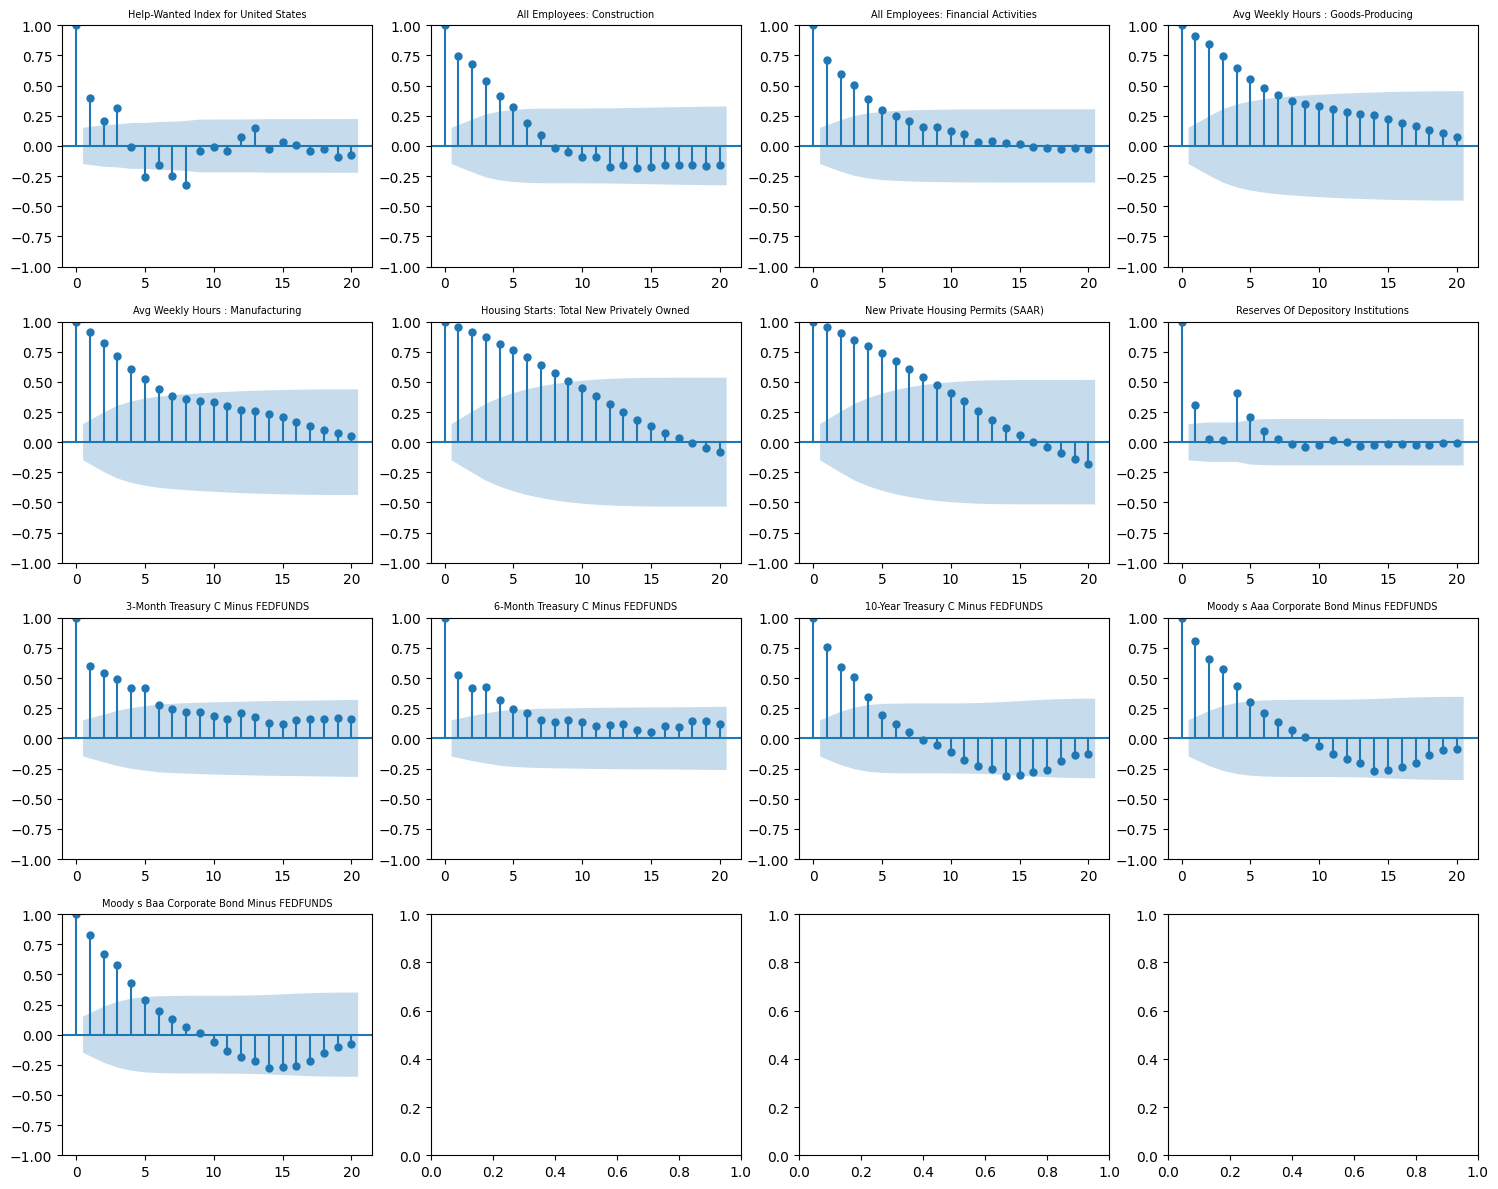

In [24]:
# Example usage
plot_seasonal_acf(joined_dataset, seasonality_presence)

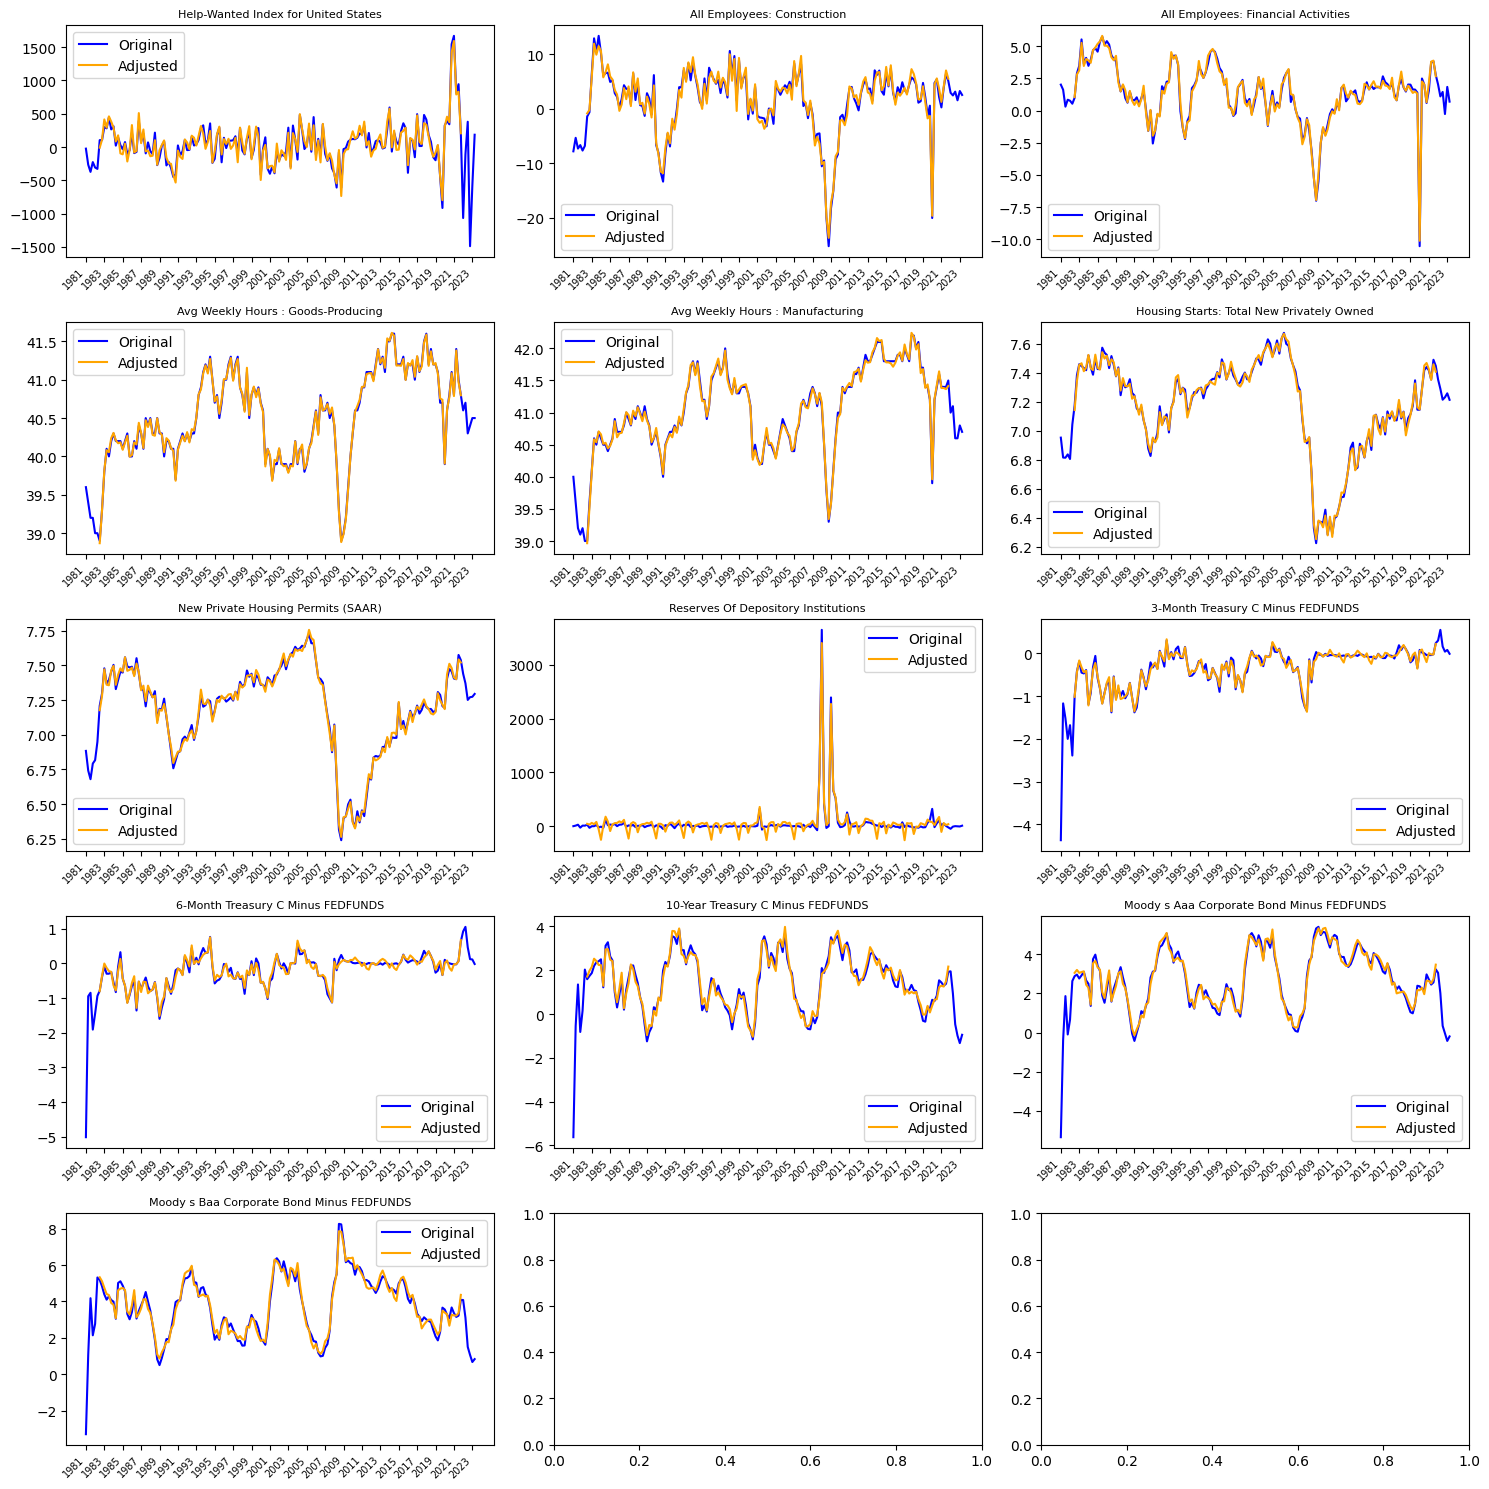

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
import math
from matplotlib import dates as mdates

# Function to adjust seasonality
def seasonally_adjust(series, model='additive', period=12):
    result = seasonal_decompose(series, model=model, period=period)
    return result.trend + result.resid  # Assuming an additive model

# Count the number of indicators with seasonality
num_seasonal_indicators = sum(seasonality_presence.values())

# Calculate the number of rows needed for subplots (3 columns)
num_rows = math.ceil(num_seasonal_indicators / 3)

# Create subplots with 3 columns
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, num_rows * 3))

# Flatten the axes array for ease of use if there's more than one row
if num_seasonal_indicators > 3:
    axes = axes.flatten()

# Plot original and adjusted data
subplot_idx = 0  # Subplot index
for indicator, has_seasonality in seasonality_presence.items():
    if has_seasonality:
        original_series = joined_dataset[indicator]
        adjusted_series = seasonally_adjust(original_series)

        # Plot original and adjusted series on the same axes
        ax = axes[subplot_idx] if num_seasonal_indicators > 3 else axes[subplot_idx % 3]
        ax.plot(original_series.index, original_series, label='Original', color='blue')
        ax.plot(adjusted_series.index, adjusted_series, label='Adjusted', color='orange')
        ax.set_title(f'{indicator}', fontsize=8)
        ax.legend()

        # Formatting the x-axis
        # Extract only the years for labels, assuming index format 'YYYYQX'
        years = [date[:4] for date in original_series.index[::8]]  # Every 4th label for yearly intervals
        ax.set_xticks(original_series.index[::8])  # Set x-ticks every 4th index
        ax.set_xticklabels(years, rotation=45, ha='right',fontsize=7)  # Set custom labels

        subplot_idx += 1  # Increment the subplot index only if the series has seasonality

plt.tight_layout()
plt.show()


<div style="color:#00BFFF">

### Initial Correlation Analysis on the Transformed Data and Rate of Change Data

**Why**: 

Given our scenario where we are analyzing a large number of indicators (123) across a lengthy period (1960 to 2023) to find those that best correlate with private consumption expenditure, and we want to `retain NaN` values due to their economic significance, `Spearman's rank correlation` with pairwise deletion seems to be the most appropriate. 

It respects the economic significance of NaN values while providing a robust correlation measure. However, we need to ensure to perform a sensitivity analysis to understand the impact of missing values results. Also, consider the potential for non-random missing data and its implications.

**What**: 
`Spearman's rank correlation` is non-parametric and does not assume a linear relationship between variables, which can be more appropriate for economic data. It also handles NaN values by default in many implementations, like in Python's Pandas library, where it ignores pairs where either value is NaN. 

**Benefits**: 

Accounts for monotonic relationships and is less sensitive to outliers (which is relevant given that you have replaced some extreme values with NaN).

**Spearman's rank correlation for log transformed data**

In [26]:
# Calculate the Spearman's rank correlation with the private consumption expenditure, handling NaNs with pairwise deletion.
correlation_matrix = joined_dataset.corr(method='pearson') #spearman

#target_correlations will have the Spearman's rank correlation coefficients
target_correlations = correlation_matrix['PCE'].sort_values(ascending=False)

# Display the correlations related to 'PCE'
print(target_correlations.head(10))
print('\n')
print(target_correlations.tail(10).sort_values(ascending=True))

PCE                                                 1.000000
All Employees: Service-Providing Industries         0.842804
All Employees: Total nonfarm                        0.816759
Civilian Employment                                 0.810069
All Employees: Retail Trade                         0.792999
All Employees: Trade, Transportation & Utilities    0.787222
All Employees: Government                           0.657109
All Employees: Wholesale Trade                      0.632347
All Employees: Nondurable goods                     0.586163
IP Index                                            0.573905
Name: PCE, dtype: float64


Civilian Unemployment Rate                   -0.805180
M1 Money Stock                               -0.796335
M2 Money Stock                               -0.656662
Real M2 Money Stock                          -0.523861
Commercial and Industrial Loans              -0.438639
Initial Claims                               -0.241939
Crude Oil, spliced WTI and Cushi

<div style="color:#00BFFF">

### Save the final cleaned and preprocessed dataframe

In [27]:
# save the data
joined_dataset.to_csv("./results/merged_data/joined_dataset_transformed.csv",index=True)